In [46]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

import seaborn as sns

import warnings

import sys
import os

In [47]:
warnings.filterwarnings("ignore")

In [48]:
UTILS_PATH = os.path.join(os.getcwd(), 'passengers.utils.py')
SHARED_PATH = os.path.join(os.getcwd(), 'passengers.shared.py')

IMPORT_LIST_PATHS = [UTILS_PATH, SHARED_PATH]

for path in IMPORT_LIST_PATHS:
  with open(path) as file:
      exec(file.read())

In [49]:
PASSENGER2_PATH = './passengers2.csv'

In [50]:
__df = pd.read_csv(PASSENGER2_PATH)

__df

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
...,...,...,...,...
139,1960-08-01,606,606.0,NaN
140,1960-09-01,508,508.0,NaN
141,1960-10-01,461,461.0,NaN
142,1960-11-01,390,390.0,NaN


In [51]:
__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      144 non-null    object 
 1   reference  144 non-null    int64  
 2   target     116 non-null    float64
 3   missing    28 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


## Заполнение с на основе предыдущих значений со сдвигом (`shift`)

In [52]:
df = __df.copy() 
df['target'] = df['target'].fillna(method='ffill')

get_not_nan_rows(df, 'missing')

,Month,reference,target,missing
3,1949-04-01,129,132.0,129.0
7,1949-08-01,148,148.0,148.0
9,1949-10-01,119,136.0,119.0
13,1950-02-01,126,115.0,126.0
20,1950-09-01,158,170.0,158.0
23,1950-12-01,140,114.0,140.0
26,1951-03-01,178,150.0,178.0
28,1951-05-01,172,163.0,172.0
35,1951-12-01,166,146.0,166.0
40,1952-05-01,183,181.0,183.0


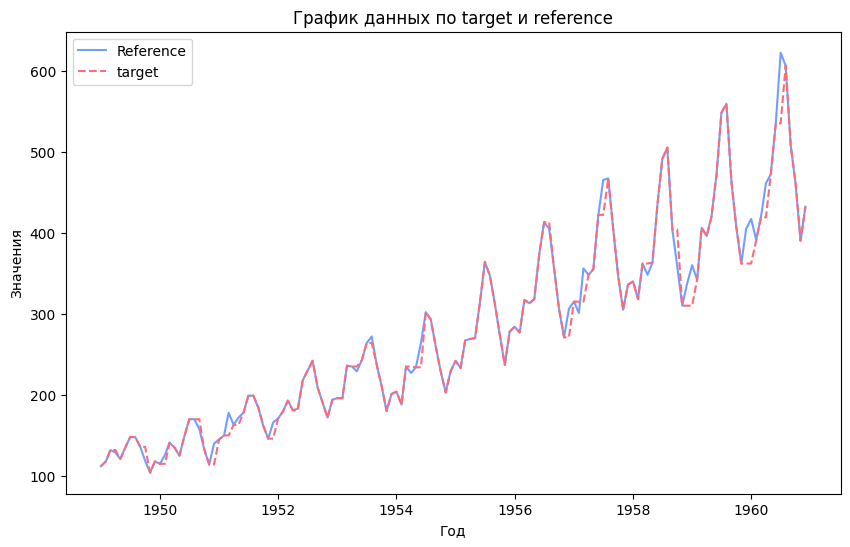

In [53]:
compare_fills(df)

## Заполнение с помощью плавающего среднего

In [54]:
df = __df.copy() 

In [55]:
def fill_with_moving_average(series, window=3):
    for i in range(len(series)):
        if pd.isna(series[i]):
            if i >= window:
                series[i] = np.mean(series[i-window:i])
    return series

In [56]:
df['target'] = fill_with_moving_average(df['target'].copy())

get_not_nan_rows(df, 'missing')

,Month,reference,target,missing
3,1949-04-01,129,120.666667,129.0
7,1949-08-01,148,134.666667,148.0
9,1949-10-01,119,139.555556,119.0
13,1950-02-01,126,112.333333,126.0
20,1950-09-01,158,163.000000,158.0
23,1950-12-01,140,136.666667,140.0
26,1951-03-01,178,143.888889,178.0
28,1951-05-01,172,152.296296,172.0
35,1951-12-01,166,164.000000,166.0
40,1952-05-01,183,184.666667,183.0


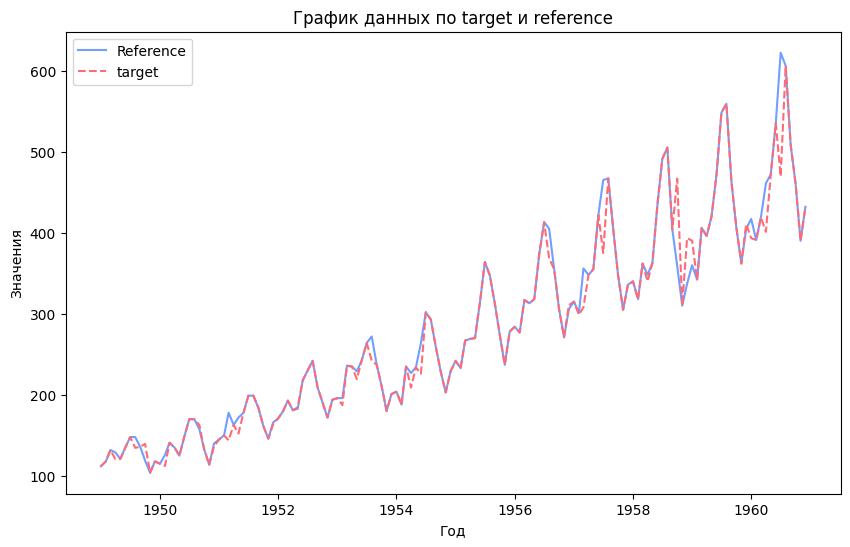

In [57]:
compare_fills(df)

## Заполнение с помощью интерполяции

In [58]:
df = __df.copy()

In [59]:
def linear_interpolation(df, column):
    for i in range(1, len(df) - 1):
        if pd.isna(df.loc[i, column]):
            x0, y0 = df.loc[i-1, 'Month'], df.loc[i-1, column]
            x1, y1 = df.loc[i+1, 'Month'], df.loc[i+1, column]
            x = df.loc[i, 'Month']
            
            y = ((y0 * (x1 - x).days) + (y1 * (x - x0).days)) / (x1 - x0).days
            df.loc[i, column] = y
    
    return df

In [60]:
df['target'] = df['target'].interpolate(method='linear')

In [61]:
get_not_nan_rows(df, 'missing')

,Month,reference,target,missing
3,1949-04-01,129,126.500000,129.0
7,1949-08-01,148,142.000000,148.0
9,1949-10-01,119,120.000000,119.0
13,1950-02-01,126,128.000000,126.0
20,1950-09-01,158,151.500000,158.0
23,1950-12-01,140,129.500000,140.0
26,1951-03-01,178,156.500000,178.0
28,1951-05-01,172,170.500000,172.0
35,1951-12-01,166,158.500000,166.0
40,1952-05-01,183,199.500000,183.0


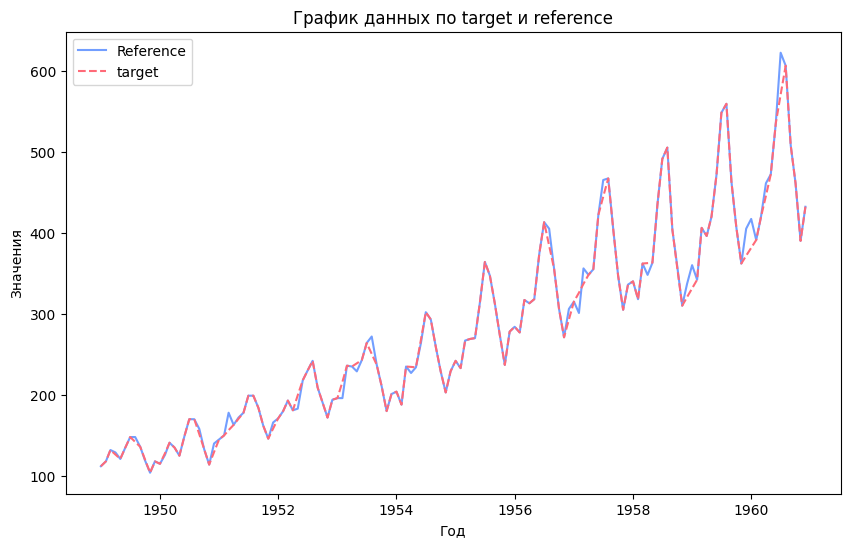

In [62]:
compare_fills(df)

## Экспоненциальное сглаживание


In [63]:
df = __df.copy()

In [64]:
d = 0.5

def exponential_smoothing(series, alpha):
    smoothed = np.zeros(len(series))
    smoothed[0] = series[0]
    
    for t in range(1, len(series)):
        smoothed[t] = alpha * smoothed[t-1] + (1 - alpha) * series[t]
    
    return smoothed

In [65]:
df['exp_sm_by_formula'] = exponential_smoothing(df['reference'], d)
df['exp_sm_ewm'] = df['reference'].ewm(d).mean()

In [66]:
get_not_nan_rows(df, 'missing')

,Month,reference,target,missing,exp_sm_by_formula,exp_sm_ewm
3,1949-04-01,129,NaN,129.0,126.250000,128.425000
7,1949-08-01,148,NaN,148.0,143.328125,146.131402
9,1949-10-01,119,NaN,119.0,129.332031,125.792034
13,1950-02-01,126,NaN,126.0,121.083252,122.417185
20,1950-09-01,158,NaN,158.0,160.125650,160.966812
23,1950-12-01,140,NaN,140.0,135.140706,134.480252
26,1951-03-01,178,NaN,178.0,161.517588,167.721491
28,1951-05-01,172,NaN,172.0,167.129397,169.524610
35,1951-12-01,166,NaN,166.0,163.274448,162.078429
40,1952-05-01,183,NaN,183.0,182.571077,183.037360


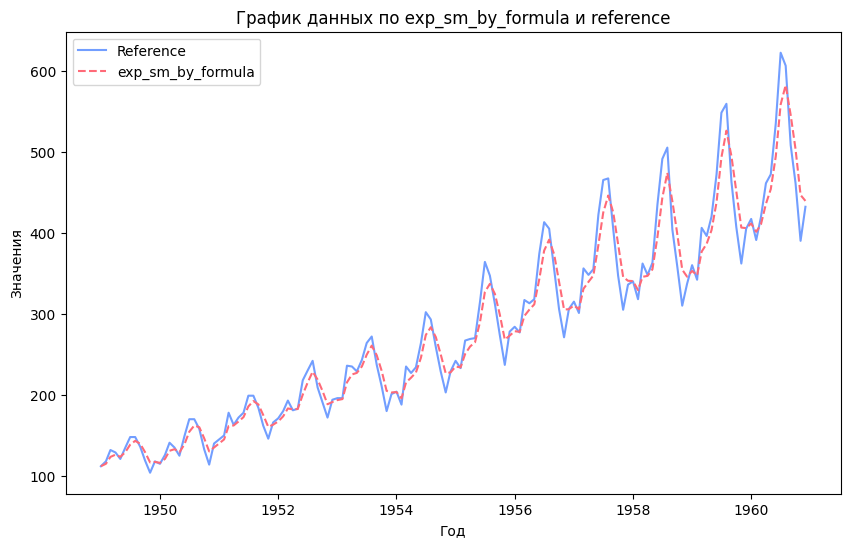

In [67]:
compare_fills(df, 'exp_sm_by_formula')

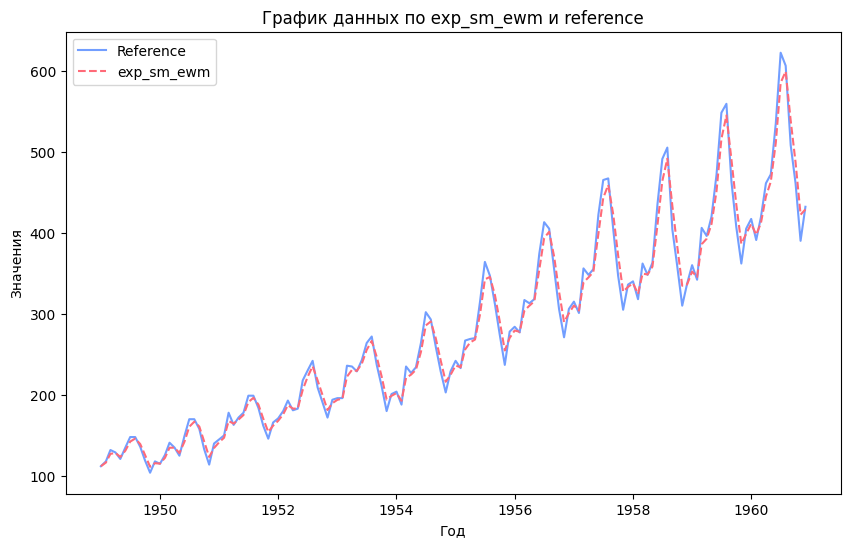

In [68]:
compare_fills(df, 'exp_sm_ewm')